In [58]:
import pandas as pd
from pycaret.regression import *
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("Datas/data_frame_florian.csv")

In [39]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,heure
0,1,0,0,1,9.84,81,0.0,16,0
1,1,0,0,1,9.02,80,0.0,40,1
2,1,0,0,1,9.02,80,0.0,32,2
3,1,0,0,1,9.84,75,0.0,13,3
4,1,0,0,1,9.84,75,0.0,1,4


# pycaret

In [10]:
model_pc = setup(data=df,target="count")

,Description,Value
0,session_id,1554
1,Target,count
2,Original Data,"(10886, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 14)"


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,46.4723,4665.6666,68.1756,0.8544,0.4662,0.5161,0.1470
xgboost,Extreme Gradient Boosting,46.8919,4802.6399,69.2062,0.8499,0.5248,0.5512,57.3730
rf,Random Forest Regressor,46.9835,5061.6922,71.0117,0.8418,0.4329,0.4434,0.5170
et,Extra Trees Regressor,47.6544,5362.3959,73.0886,0.8324,0.4405,0.4494,0.4220
gbr,Gradient Boosting Regressor,57.9211,7155.6422,84.4636,0.7762,0.6562,0.8847,0.1550
dt,Decision Tree Regressor,60.9916,9518.2946,97.4206,0.7019,0.5511,0.5258,0.0170
ada,AdaBoost Regressor,91.9719,13504.7697,116.1151,0.5764,1.0140,2.3493,0.1110
knn,K Neighbors Regressor,86.1317,15818.6448,125.6354,0.5052,0.8912,1.7102,0.0180
br,Bayesian Ridge,106.5706,20967.0774,144.7058,0.3436,1.2039,3.1394,0.0090
ridge,Ridge Regression,106.6117,20967.4389,144.7059,0.3436,1.2043,3.1443,0.0090


# XGBoost

In [50]:
y = df.pop("count")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)



In [53]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [57]:
xgb = XGBRegressor()
cat_feature = ["season","weather"]
cat_pip = make_pipeline(OneHotEncoder())
num_feature = ["temp","humidity","windspeed","heure"]
num_pip = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((cat_pip,cat_feature),(num_pip,num_feature),remainder="passthrough")

pip = make_pipeline(preprocessor,xgb)

In [55]:

model_xgb = pip.fit(X_train,y_train)

In [56]:
model_xgb.score(X_test,y_test)

0.8588525088509243

In [61]:
model_xgb[1]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

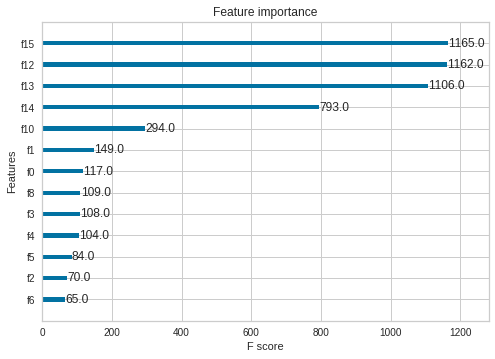

In [62]:
plot_importance(model_xgb[1])